In [1]:
# load data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# data attributes
x_train = train_images.reshape(60000, 784)
x_test = test_images.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
# plot_history function
def plot_history(net_history):
    history = net_history.history
    import matplotlib.pyplot as plt
    print(history.keys())
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies = history['accuracy']
    val_accuracies = history['val_accuracy']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss', 'val_loss'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['acc', 'val_acc'])

In [3]:
# functinal API
from keras.models import Model    # functional API == Model
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy   # because output are multi-classes

# in functional API we need a input layer to make clear input_shape
input = Input(shape=(784,))
x = Dense(500, activation='relu')(input)    # in functional API, in each layer we must make clear what the input is
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

my_model = Model(input, output)         # makes input and output layers
my_model.summary()
my_model.compile(optimizer=SGD(learning_rate=0.01), loss=categorical_crossentropy, metrics=["accuracy"])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 1.2045 - accuracy: 0.7076 - val_loss: 0.5805 - val_accuracy: 0.8658
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.5010 - accuracy: 0.8730 - val_loss: 0.3972 - val_accuracy: 0.8973
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3883 - accuracy: 0.8947 - val_loss: 0.3349 - val_accuracy: 0.9085
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3393 - accuracy: 0.9061 - val_loss: 0.3033 - val_accuracy: 0.9173
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3099 - accuracy: 0.9129 - val_loss: 0.2821 - val_accuracy: 0.9227
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2882 - accuracy: 0.9181 - val_loss: 0.2667 - val_accuracy: 0.9260
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2712 - accuracy: 0.9229 - val_loss: 0.2534 - val_accuracy: 0.9297
Epoch 

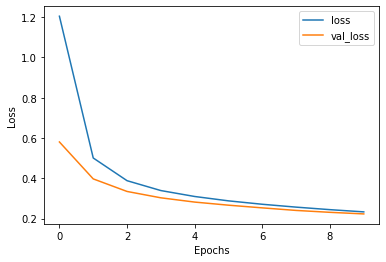

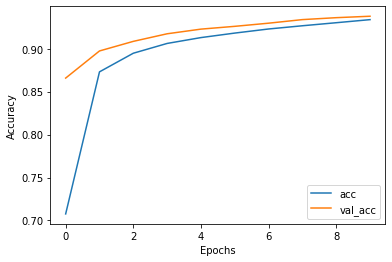

In [4]:
# train the model
network_history = my_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
plot_history(network_history)

In [5]:
# evaluation
test_loss, test_acc = my_model.evaluate(x_test, y_test)
test_labels_predict = my_model.predict(x_test)

import numpy as np
test_labels_predict = np.argmax(test_labels_predict, axis=1)

print(test_labels_predict[2])
print(y_test[2])

313/313 [==============================] - 1s 2ms/step - loss: 0.2257 - accuracy: 0.9364
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
